In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [ ]:
from pymongo import MongoClient

client = MongoClient("")
db = client["dataEngineering"]
col = db["GoogleMap_jeju"]

In [23]:
# 잘못된 문서 몇 개만 확인
invalid_docs = col.find({'location.coordinates': {'$in': [None]}})
for doc in invalid_docs:
    print(doc['_id'], doc.get('tour_name'), doc.get('location.coordinates'), doc.get('latitude'), doc.get('longitude'))

67f4fc0e2a6ffbda24e58d7b 환상숲곶자왈공원 None 33.3225764 126.2633048
67f4fc0e2a6ffbda24e58d7c 해거름전망대 None 33.3711054 126.2063057
67f4fc0f2a6ffbda24e58d7d 본태박물관 None 33.3038302 126.3925024
67f4fc112a6ffbda24e58d7e 우도등대 None 33.4932348 126.9661369
67f4fc122a6ffbda24e58d7f 산양큰엉곶(반딧불탐방) None 33.2909385 126.2506335
67f4fc132a6ffbda24e58d80 신창풍차해안 None 33.3433637 126.173963
67f4fc152a6ffbda24e58d81 안덕계곡 None 33.2573447 126.3528872
67f4fc152a6ffbda24e58d82 스누피가든 None 33.4441972 126.7783058
67f4fc152a6ffbda24e58d83 제주신산근린공원 None 33.5059296 126.532976
67f4fc152a6ffbda24e58d84 종달 고망난돌쉼터 None 33.5103518 126.9064967
67f4fc152a6ffbda24e58d85 아프리카박물관 None 33.2398402 126.4291443
67f4fc162a6ffbda24e58d86 소인국 테마파크 None 33.2820907 126.3317874
67f4fc162a6ffbda24e58d87 제주도립 김창열미술관 None 33.3391085 126.2687552
67f4fc162a6ffbda24e58d88 김녕해수욕장 None 33.5582327 126.759787
67f4fc172a6ffbda24e58d89 제주밭담테마공원 None 33.5629582 126.779381
67f4fc172a6ffbda24e58d8a 형제섬 None 33.2099736 126.3143349
67f4fc172a6ffbda24e58d8b 상효원 N

In [ ]:
from bson import ObjectId


# 업데이트할 데이터
update_data = {
    "환상숲곶자왈공원": (33.3225764, 126.2633048),
    "해거름전망대": (33.3711054, 126.2063057),
    "본태박물관": (33.3038302, 126.3925024),
    "우도등대": (33.4932348, 126.9661369),
    "산양큰엉곶(반딧불탐방)": (33.2909385, 126.2506335),
    "신창풍차해안": (33.3433637, 126.173963),
    "안덕계곡": (33.2573447, 126.3528872),
    "스누피가든": (33.4441972, 126.7783058),
    "제주신산근린공원": (33.5059296, 126.532976),
    "종달 고망난돌쉼터": (33.5103518, 126.9064967),
    "아프리카박물관": (33.2398402, 126.4291443),
    "소인국 테마파크": (33.2820907, 126.3317874),
    "제주도립 김창열미술관": (33.3391085, 126.2687552),
    "김녕해수욕장": (33.5582327, 126.759787),
    "제주밭담테마공원": (33.5629582, 126.779381),
    "형제섬": (33.2099736, 126.3143349),
    "상효원": (33.3063966, 126.5844191),
    "하도해수욕장": (33.5129086, 126.8988168),
    "느지리오름(망오름)": (33.3653429, 126.2613767)
}

# 문서 업데이트
for tour_name, (lat, lon) in update_data.items():
    result = col.update_one(
        {"tour_name": tour_name},
        {
            "$set": {
                "latitude": lat,
                "longitude": lon,
            }
        }
    )
    print(f"{tour_name} 업데이트 완료: {result.modified_count}건 변경됨")

환상숲곶자왈공원 업데이트 완료: 1건 변경됨
환상숲곶자왈공원 업데이트 완료: 1건 변경됨
환상숲곶자왈공원 업데이트 완료: 1건 변경됨
환상숲곶자왈공원 업데이트 완료: 1건 변경됨
환상숲곶자왈공원 업데이트 완료: 1건 변경됨
환상숲곶자왈공원 업데이트 완료: 1건 변경됨
환상숲곶자왈공원 업데이트 완료: 1건 변경됨
환상숲곶자왈공원 업데이트 완료: 1건 변경됨
환상숲곶자왈공원 업데이트 완료: 1건 변경됨
환상숲곶자왈공원 업데이트 완료: 1건 변경됨
환상숲곶자왈공원 업데이트 완료: 1건 변경됨
환상숲곶자왈공원 업데이트 완료: 1건 변경됨
환상숲곶자왈공원 업데이트 완료: 1건 변경됨
환상숲곶자왈공원 업데이트 완료: 1건 변경됨
환상숲곶자왈공원 업데이트 완료: 1건 변경됨
환상숲곶자왈공원 업데이트 완료: 1건 변경됨
환상숲곶자왈공원 업데이트 완료: 1건 변경됨
환상숲곶자왈공원 업데이트 완료: 1건 변경됨
환상숲곶자왈공원 업데이트 완료: 0건 변경됨


In [27]:
import re
for doc in col.find({"review_count": {"$type": "string"}}):  # 문자열인 경우만 처리
    raw = doc["review_count"]
    cleaned = re.sub(r"[^\d]", "", raw)  # 괄호, 쉼표 등 숫자 이외 제거
    if cleaned.isdigit():
        col.update_one(
            {"_id": doc["_id"]},
            {"$set": {"review_count": int(cleaned)}}
        )
        print(f"{doc.get('tour_name', doc['_id'])} → {raw} → {cleaned}")

김녕미로공원 → (3,878) → 3878
제주절물자연휴양림 → (6,629) → 6629
우도등대공원 → (96) → 96
혼인지 → (1,446) → 1446
용담포구 → (169) → 169
용머리해안 → (4,847) → 4847
생각하는정원(Spirited Garden) → (1,574) → 1574
제주돌마을공원 → (221) → 221
거문오름 → (993) → 993
제주빅볼랜드 → (570) → 570
궷물오름 → (334) → 334
용연구름다리 → (2,540) → 2540
서건도 → (379) → 379
한라수목원 → (5,474) → 5474
사계해안 → (244) → 244
제주허브동산 → (2,579) → 2579
아쿠아플라넷 제주 → (13,601) → 13601
식산봉 (바위오름) → (34) → 34
엉또폭포 → (907) → 907
제주센트럴파크 → (670) → 670
이중섭거리 → (4,065) → 4065
한라 생태숲 → (1,696) → 1696
제주 4·3 평화공원 → (3,134) → 3134
물영아리오름 → (479) → 479
새연교 → (2,480) → 2480
제주현대미술관 → (1,347) → 1347
라온더마파크 → (4,018) → 4018
어음리 억새 군락지 → (101) → 101
연화지 → (285) → 285
피규어뮤지엄제주 → (2,974) → 2974
제주동백수목원 → (2,346) → 2346
제주 레일바이크 → (4,474) → 4474
신비의도로 (도깨비도로) → (3,818) → 3818
한라산 국립공원 → (3,718) → 3718
제주목 관아 → (1,439) → 1439
녹차미로공원 → (444) → 444
협재해변 → (8,045) → 8045
정방폭포 → (11,628) → 11628
제주조천 스위스마을 → (1,832) → 1832
제주민속촌 → (4,594) → 4594
두맹이골목 → (214) → 214
한담해안산책로 → (262) → 262
생이기정 → (53) → 53

In [29]:
for doc in col.find({"avg_rating": {"$type": "string"}}):  # 문자열 타입만 대상으로 함
    raw = doc["avg_rating"]
    try:
        rating = float(raw)
        col.update_one(
            {"_id": doc["_id"]},
            {"$set": {"avg_rating": rating}}
        )
        print(f"{doc.get('tour_name', doc['_id'])} → {raw} → {rating}")
    except ValueError:
        print(f"변환 실패: {doc.get('tour_name', doc['_id'])} → {raw}")

김녕미로공원 → 4.2 → 4.2
제주절물자연휴양림 → 4.6 → 4.6
우도등대공원 → 4.2 → 4.2
혼인지 → 4.2 → 4.2
용담포구 → 4.4 → 4.4
용머리해안 → 4.4 → 4.4
생각하는정원(Spirited Garden) → 4.2 → 4.2
제주돌마을공원 → 3.9 → 3.9
거문오름 → 4.6 → 4.6
제주빅볼랜드 → 3.6 → 3.6
궷물오름 → 4.2 → 4.2
용연구름다리 → 4.2 → 4.2
서건도 → 4.2 → 4.2
한라수목원 → 4.3 → 4.3
사계해안 → 4.6 → 4.6
제주허브동산 → 4.2 → 4.2
아쿠아플라넷 제주 → 4.4 → 4.4
식산봉 (바위오름) → 4.6 → 4.6
엉또폭포 → 4.0 → 4.0
제주센트럴파크 → 3.5 → 3.5
이중섭거리 → 3.9 → 3.9
한라 생태숲 → 4.5 → 4.5
제주 4·3 평화공원 → 4.7 → 4.7
물영아리오름 → 4.5 → 4.5
새연교 → 4.4 → 4.4
제주현대미술관 → 4.3 → 4.3
라온더마파크 → 4.3 → 4.3
어음리 억새 군락지 → 4.6 → 4.6
연화지 → 3.8 → 3.8
피규어뮤지엄제주 → 4.4 → 4.4
제주동백수목원 → 4.1 → 4.1
제주 레일바이크 → 3.9 → 3.9
신비의도로 (도깨비도로) → 3.8 → 3.8
한라산 국립공원 → 4.7 → 4.7
제주목 관아 → 4.2 → 4.2
녹차미로공원 → 4.1 → 4.1
협재해변 → 4.6 → 4.6
정방폭포 → 4.5 → 4.5
제주조천 스위스마을 → 3.5 → 3.5
제주민속촌 → 4.1 → 4.1
두맹이골목 → 3.7 → 3.7
한담해안산책로 → 4.6 → 4.6
생이기정 → 4.7 → 4.7
제주해녀박물관 → 4.3 → 4.3
여미지 식물원 → 4.0 → 4.0
에코랜드 → 4.3 → 4.3
절부암 → 4.0 → 4.0
서귀포 치유의숲 → 4.6 → 4.6
동백 포레스트 → 4.0 → 4.0
제주특별자치도 민속자연사박물관 → 4.2 → 4.2
테지움 제주 → 4.0 → 

#### 1. MongoDB GeoJSON 포맷 변환 및 인덱스 생성

In [24]:
# 각 문서에 'location' 필드를 추가 (GeoJSON 포맷)
for doc in col.find():
    if 'latitude' in doc and 'longitude' in doc:
        col.update_one(
            {'_id': doc['_id']},
            {'$set': {
                'location': {
                    'type': 'Point',
                    'coordinates': [doc['longitude'], doc['latitude']]
                }
            }}
        )

# 2dsphere 인덱스 생성
col.create_index([('location', '2dsphere')])

'location_2dsphere'

In [51]:
from pprint import pprint

docs = col.find().limit(1)

print("✅ 저장된 데이터 미리보기:")
for doc in docs:
    pprint(doc)

✅ 저장된 데이터 미리보기:
{'_id': ObjectId('67f4bc02e822ccb198c3e63b'),
 'address': '· 구좌읍 만장굴길 122',
 'avg_rating': 4.2,
 'latitude': 33.3653429,
 'location': {'coordinates': [126.2613767, 33.3653429], 'type': 'Point'},
 'longitude': 126.2613767,
 'review_count': 3878,
 'reviews': [{'content': '아이들 데리고 오기 너무좋아요 야외&실내 놀이터도 있고 고양이들도 많아서 먹이주기 체험도 하고 '
                         '아이들이 엄청 즐겁게 놀았어요 다음에 또 오고싶은 곳이에요',
              'rating': 5,
              'reviewer': 'SKY'},
             {'content': '미로공원..처음에 생각은 대충 구색만 맞춘 미로이고 금방나오겠지 했는데 1시간 헤맸습니다.\n'
                         '심각하게 잘못되었다는걸 느끼고 다시 입구로 나와서 출구를 역으로 찾아가서 제주도 스탬프 찍고 '
                         '종치고 나왔습니다.\n'
                         '입구에서 부터 고양이가 있지만 미로 중간중간 나무 그늘에도 고양이가 있습니다.\n'
                         '관광객으로 부터 고양이사료를 많이 받아 먹었는지 줘도 잘 먹지 않습니다.\n'
                         '중간중간 삶 시리지 문구와 미로 막다른곳에 있는 멘탈 부여잡게 만드는 메세지들이 '
                         '재미있습니다.\n'
                         '\n'
                         '<비짓제주 원문>\n'
              

In [3]:
# location과 avg_rating만 포함
docs = list(col.find({
    'location': {'$exists': True},
    'avg_rating': {'$ne': None}
}, {
    '_id': 0,
    'tour_name': 1,
    'avg_rating': 1,
    'review_count' : 1,
    'location.coordinates': 1,
    #'category': 1,
    #'keyword': 1,
    #'sentiment': 1
}))

# 좌표와 평점 추출
data = []
for doc in docs:
    lon, lat = doc['location']['coordinates']
    data.append({
        'tour_name': doc['tour_name'],
        'latitude': lat,
        'longitude': lon,
        'review_count': doc['review_count'],
        'avg_rating': doc['avg_rating'],
        #'category': doc['category'],
        #'keyword': doc['keyword'],
        #'sentiment': doc['sentiment']
    })

df = pd.DataFrame(data)
df.head(3)

,tour_name,latitude,longitude,review_count,avg_rating
0,김녕미로공원,33.365343,126.261377,3878,4.2
1,제주절물자연휴양림,33.439362,126.629910,6629,4.6
2,우도등대공원,33.494301,126.964862,96,4.2


#### 2-1. 각 위치 군집별 평균 평점 계산 : 위도/경도 기반 KMeans 클러스터링

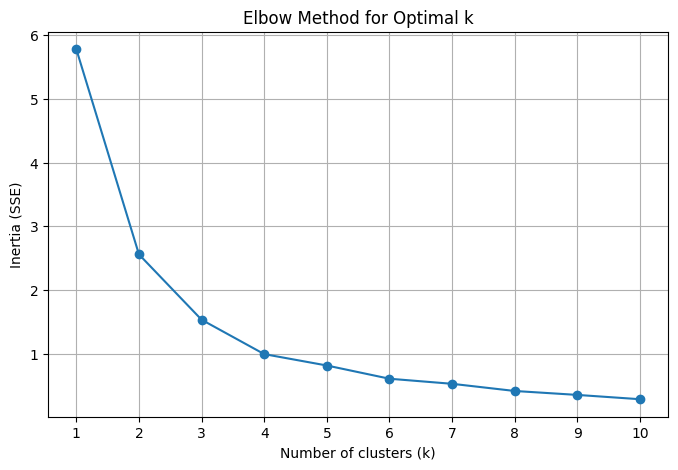

In [4]:
# 1) 사용할 좌표만 추출
X = df[['latitude', 'longitude']]

# 2) 여러 K값에 대해 inertia 계산
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# 3) 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.xticks(k_range)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

k=2, silhouette_score=0.4586
k=3, silhouette_score=0.4238
k=4, silhouette_score=0.4874
k=5, silhouette_score=0.4743
k=6, silhouette_score=0.4511
k=7, silhouette_score=0.4427
k=8, silhouette_score=0.4713
k=9, silhouette_score=0.4531
k=10, silhouette_score=0.4809


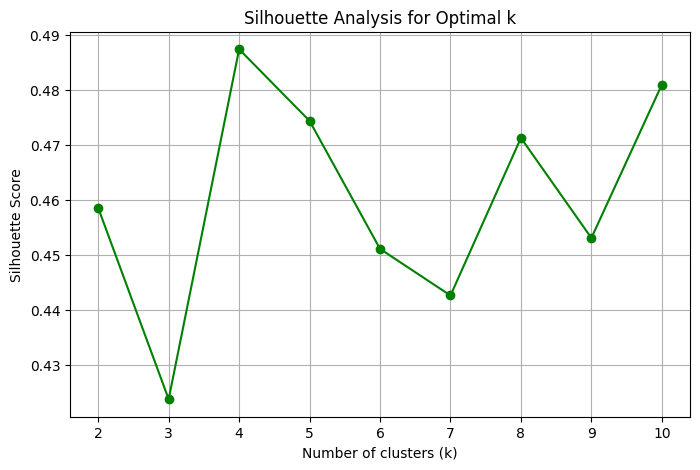

In [ ]:
from sklearn.metrics import silhouette_score

# 1. 2D 데이터 (예: score만 가지고)
X = df[['latitude', 'longitude']]

# 2. silhouette score 계산 (k=2 이상부터 가능)
scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)
    print(f"k={k}, silhouette_score={score:.4f}")

# 3. 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, marker='o', color='green')
plt.xticks(k_range)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_49304\605798249.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='kmeans', y='avg_rating', data=df,


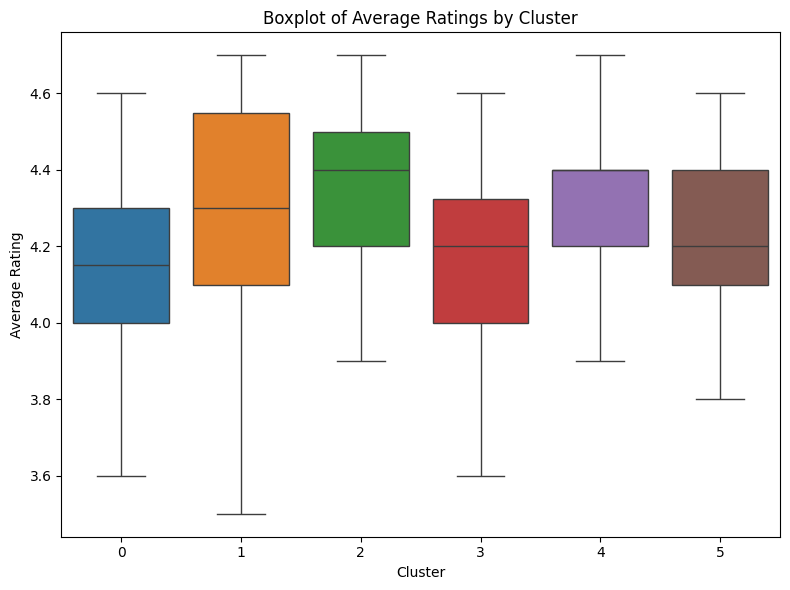

In [4]:
# 클러스터링
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
df['kmeans'] = kmeans.fit_predict(df[['latitude', 'longitude']])

# 고정된 색상 매핑 (tab10은 10가지 색상 제공)
palette = sns.color_palette("tab10", n_colors=k)
cluster_order = sorted(df['kmeans'].unique())  # 클러스터 순서 정렬

# 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(x='kmeans', y='avg_rating', data=df,
            order=cluster_order, palette=palette)
plt.title("Boxplot of Average Ratings by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

In [7]:
# 클러스터별 평균, 중앙값 요약
cluster_stats = df.groupby('kmeans')['avg_rating'].agg(['mean', 'median', 'count']).reset_index(drop=True)
print(cluster_stats)

       mean  median  count
0  4.137500    4.15     16
1  4.263158    4.30     19
2  4.352381    4.40     21
3  4.157143    4.20     28
4  4.311111    4.40     18
5  4.241176    4.20     17


In [6]:
from scipy.stats import shapiro

for c in sorted(df["kmeans"].dropna().unique()):
    scores = df[df["kmeans"] == c]["avg_rating"]
    stat, p = shapiro(scores)
    print(f"클러스터 {c} - Shapiro-Wilk p-value: {p:.4f}")


from scipy.stats import levene

grouped_scores = [
    df[df["kmeans"] == c]["avg_rating"].values
    for c in sorted(df["kmeans"].dropna().unique())
]

stat, p = levene(*grouped_scores)
print(f"Levene 등분산성 검정 p-value: {p:.4f}")

클러스터 0 - Shapiro-Wilk p-value: 0.8534
클러스터 1 - Shapiro-Wilk p-value: 0.0342
클러스터 2 - Shapiro-Wilk p-value: 0.6467
클러스터 3 - Shapiro-Wilk p-value: 0.4788
클러스터 4 - Shapiro-Wilk p-value: 0.2523
클러스터 5 - Shapiro-Wilk p-value: 0.2135
Levene 등분산성 검정 p-value: 0.4829


In [6]:
# 클러스터와 평점 간의 상관관계 확인
from scipy.stats import kruskal
groups = [group['avg_rating'].values for name, group in df.groupby('kmeans')]
h_stat, p_val = kruskal(*groups)
print(f"Kruskal-Wallis p-value: {p_val:.4e}")                                          # H-statistic: {h_stat:.4f}

Kruskal-Wallis p-value: 6.6121e-02


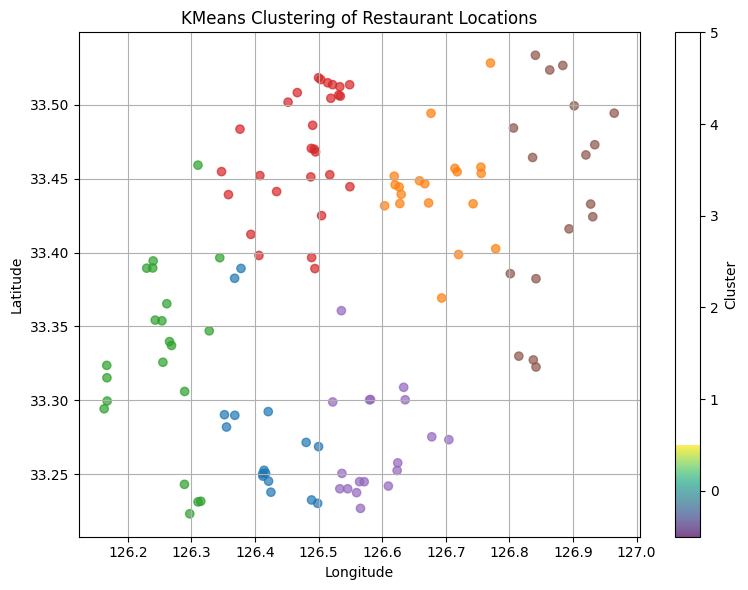

In [5]:
# 산점도 시각화
plt.figure(figsize=(8, 6))
colors = [palette[label] for label in df['kmeans']]
scatter = plt.scatter(
    df['longitude'], df['latitude'],
    c=colors, alpha=0.7
)
plt.title("KMeans Clustering of Restaurant Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cbar = plt.colorbar(scatter, ticks=range(k))
cbar.set_label("Cluster")
cbar.set_ticks(np.arange(k) + 0.5)
cbar.set_ticklabels(cluster_order)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import folium
from folium import plugins
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.colors as mcolors

from pymongo import MongoClient

client = MongoClient("")
db = client["dataEngineering"]
col = db["kmap_jeju"]

docs = list(col.find({
    'location': {'$exists': True},
    'avg_rating': {'$ne': None},
    'restaurant_name': {'$exists': True}  # 추가!
}, {
    '_id': 0,
    'restaurant_name': 1,
    'avg_rating': 1,
    'review_count' : 1,
    'location.coordinates': 1,
}))

# 좌표와 평점 추출
data = []
for doc in docs:
    coords = doc.get('location', {}).get('coordinates')
    if (coords and len(coords) == 2 
        and all(isinstance(v, (int, float)) for v in coords)
        and 'restaurant_name' in doc):
        
        lon, lat = coords
        data.append({
            'restaurant_name': doc['restaurant_name'],
            'latitude': lat,
            'longitude': lon,
            'review_count': doc.get('review_count', 0),
            'avg_rating': doc.get('avg_rating', 0),
        })

df = pd.DataFrame(data)
df = df.dropna(subset=['latitude', 'longitude']).reset_index(drop=True)

k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
df['kmeans'] = kmeans.fit_predict(df[['latitude', 'longitude']])
cluster_order = sorted(df['kmeans'].unique())  # 클러스터 순서 정렬

# 중심 좌표 설정 (예: 위도/경도 평균)
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()

# 클러스터 색상 팔레트 정의 (예: matplotlib colormap 사용)
colormap = plt.cm.get_cmap('tab10', k)  # k: 클러스터 개수
palette = {i: f"#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}" 
           for i, (r, g, b, _) in enumerate(colormap(np.arange(k)))}
#palette_rgb = sns.color_palette("tab10", n_colors=k)
#palette = {i: mcolors.to_hex(rgb) for i, rgb in enumerate(palette_rgb)}

# folium 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

# 클러스터별 마커 추가
for _, row in df.iterrows():
    cluster = row['kmeans']
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,
        color=palette[cluster],
        fill=True,
        fill_opacity=0.7,
        popup=f"Cluster {cluster}"
    ).add_to(m)

# 지도 HTML로 저장
m.save("kmeans_cluster_map.html")

C:\Users\pc\AppData\Local\Temp\ipykernel_53896\1556519192.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10', k)  # k: 클러스터 개수


In [7]:
import matplotlib.colors as mcolors

# Seaborn color palette (tab10) → HTML 색상 코드로 변환
palette = sns.color_palette("tab10", n_colors=k)
html_colors = [mcolors.to_hex(c) for c in palette]  # '#RRGGBB' 형식

# 클러스터 → 색상 딕셔너리 매핑
cluster_color_map = {
    cluster: html_colors[i]
    for i, cluster in enumerate(sorted(df['kmeans'].unique()))
}

# 지도 생성
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# 히트맵 (평점 반영)
heat_data = [[row['latitude'], row['longitude'], row['avg_rating']] for _, row in df.iterrows()]
HeatMap(heat_data, radius=15).add_to(m)

# 클러스터 중심점에 마커 (색상 적용)
centers = df.groupby('kmeans')[['latitude', 'longitude']].mean().reset_index()
for _, row in centers.iterrows():
    color = cluster_color_map[row['kmeans']]
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"Cluster {row['kmeans']}",
        icon=folium.Icon(color='white', icon_color=color, icon='info-sign')
    ).add_to(m)

m.save("kmeans_cluster_heatmap.html")

In [8]:
# 클러스터 수 및 색상 매핑
k = df['kmeans'].nunique()
palette = sns.color_palette("tab10", n_colors=k)
html_colors = [mcolors.to_hex(c) for c in palette]
cluster_color_map = {
    cluster: html_colors[i]
    for i, cluster in enumerate(sorted(df['kmeans'].unique()))
}

# Folium 지도 생성
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# 히트맵 (평점 반영)
heat_data = [[row['latitude'], row['longitude'], row['avg_rating']] for _, row in df.iterrows()]
HeatMap(heat_data, radius=15).add_to(m)

# 클러스터 중심 마커 (큰 아이콘)
centers = df.groupby('kmeans')[['latitude', 'longitude']].mean().reset_index()
for _, row in centers.iterrows():
    color = cluster_color_map[row['kmeans']]
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"Cluster {row['kmeans']}",
        icon=folium.Icon(color='white', icon_color=color, icon='info-sign')
    ).add_to(m)

# 데이터 포인트 산점도 (원형 마커)
for _, row in df.iterrows():
    cluster = row['kmeans']
    color = cluster_color_map[cluster]
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Rating: {row['avg_rating']:.2f}<br>Cluster: {cluster}"
    ).add_to(m)

# 저장
m.save("kmeans_cluster_scatter_map.html")


#### 2-2. 각 위치 군집별 평균 평점 계산 : 위도/경도 기반 4분면 클러스터링

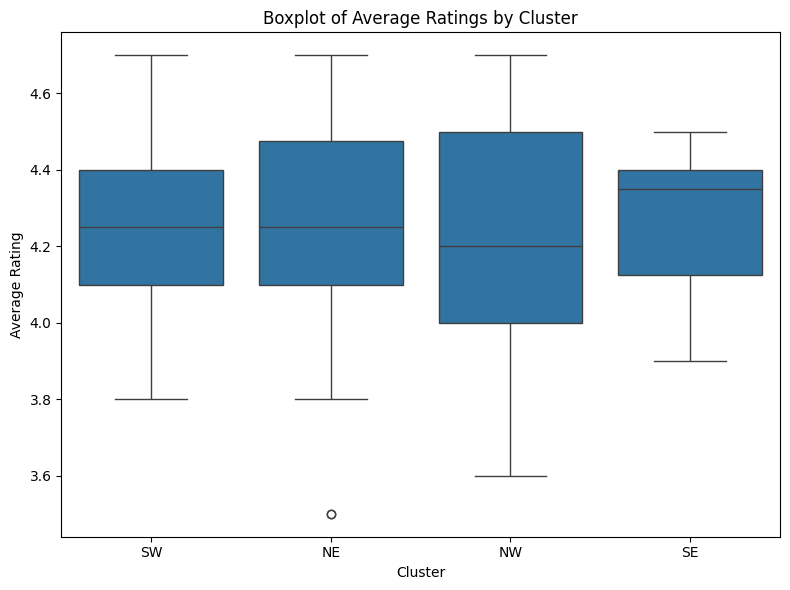

In [36]:
# 클러스터링
lat_mid = df['latitude'].mean()
lon_mid = df['longitude'].mean()

def assign_quadrant(row):
    if row['latitude'] >= lat_mid and row['longitude'] >= lon_mid:
        return 'NE'
    elif row['latitude'] >= lat_mid and row['longitude'] < lon_mid:
        return 'NW'
    elif row['latitude'] < lat_mid and row['longitude'] >= lon_mid:
        return 'SE'
    else:
        return 'SW'

df['quadrant'] = df.apply(assign_quadrant, axis=1)

# 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(x='quadrant', y='avg_rating', data=df)
plt.title("Boxplot of Average Ratings by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

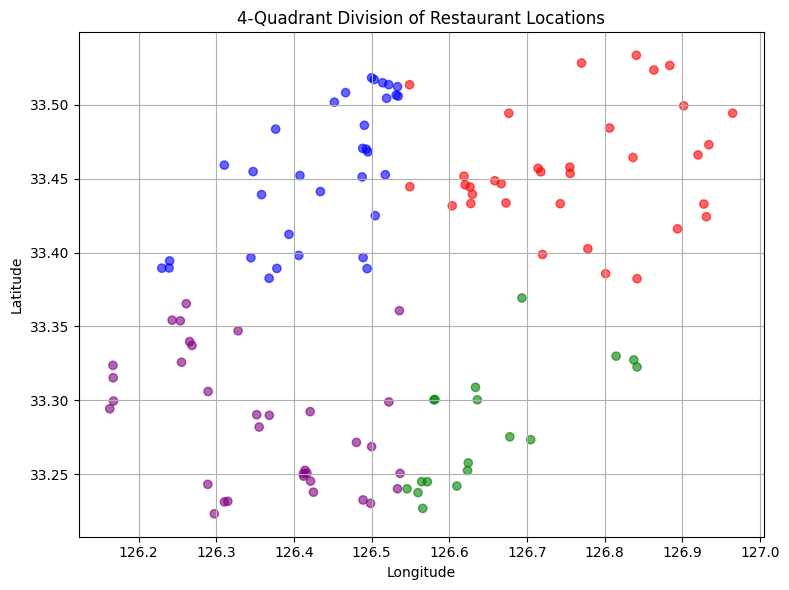

In [37]:
color_map = {
    'NE': 'red',
    'NW': 'blue',
    'SE': 'green',
    'SW': 'purple'
}

df['quadrant_color'] = df['quadrant'].map(color_map)

plt.figure(figsize=(8, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['quadrant_color'], alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('4-Quadrant Division of Restaurant Locations')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# 히트맵 추가 (평점 포함)
heat_data = [[row['latitude'], row['longitude'], row['avg_rating']] for _, row in df.iterrows()]
HeatMap(heat_data, radius=15).add_to(m)

# 4분면별 중심점 계산
centers = df.groupby('quadrant')[['latitude', 'longitude']].mean().reset_index()

# 사분면 색상 매핑 (Folium은 제한된 색만 허용)
color_map = {
    'NE': 'red',
    'NW': 'blue',
    'SE': 'green',
    'SW': 'purple'
}

# 중심점 마커 추가
for _, row in centers.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Quadrant {row['quadrant']}",
        icon=folium.Icon(color=color_map.get(row['quadrant'], 'gray'))
    ).add_to(m)

# 지도 저장
m.save("quadrant_cluster_heatmap.html")

#### 3. 평점 + 리뷰 수 기반 상위 10개 장소 & 클러스터링

In [11]:
map_ = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# 1. 히트맵
#heat_data = [[row['latitude'], row['longitude'], row['avg_rating']] for _, row in df.iterrows()]
#HeatMap(heat_data, radius=15).add_to(map_)

# 전체 평균 및 최소 리뷰 수
C = df['avg_rating'].mean()
m = df['review_count'].quantile(0.50)

# Bayesian Avg
df['score'] = ((df['review_count'] / (df['review_count'] + m)) * df['avg_rating'] + (m / (df['review_count'] + m)) * C)
df['rank'] = df['score'].rank(method='min', ascending=False).astype(int)
#top_df = df[df['score'] >= df['score'].quantile(0.99)]
top_df = df.nlargest(10, 'score') # 동점자 허용

In [12]:
for _, row in top_df.iterrows():
    popup_html = f"""
    <b>{row['tour_name']}</b><br>
    <div style="display:flex; gap:8px;">
        <span>Rank {row['rank']}</span>
        <span>Rating {row['avg_rating']:.1f}</span>
        <span>Score {row['score']:.2f}</span>
    </div>
"""
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_html,
        icon=folium.Icon(color='red', icon='star')
    ).add_to(map_)

map_.save("top_tour_map.html")

In [ ]:
# Composite Score
df['score'] = df['avg_rating'] * np.log1p(df['review_count']) # 평점 * log(1 + 리뷰 수)
df['rank'] = df['score'].rank(method='min', ascending=False).astype(int)
threshold = df['score'].quantile(0.99)  # 상위 1% 복합점수
top_df = df[df['score'] >= threshold]

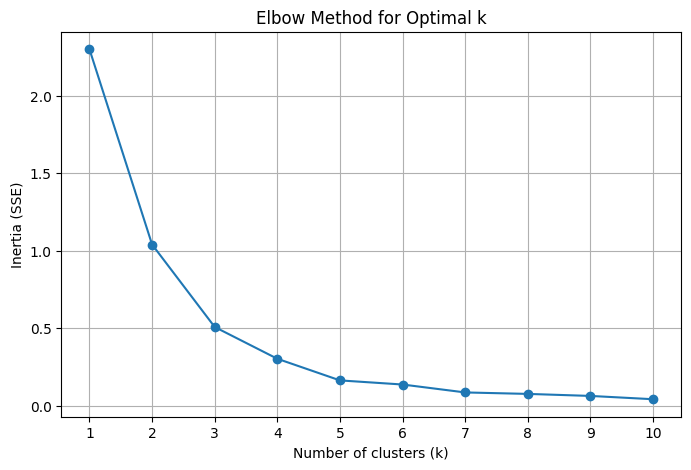

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1) 사용할 좌표만 추출
X = df[['score']]

# 2) 여러 K값에 대해 inertia 계산
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# 3) 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.xticks(k_range)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

k=2, silhouette_score=0.5900
k=3, silhouette_score=0.5832
k=4, silhouette_score=0.5487
k=5, silhouette_score=0.5861
k=6, silhouette_score=0.5123
k=7, silhouette_score=0.5967
k=8, silhouette_score=0.5923
k=9, silhouette_score=0.5429
k=10, silhouette_score=0.5475


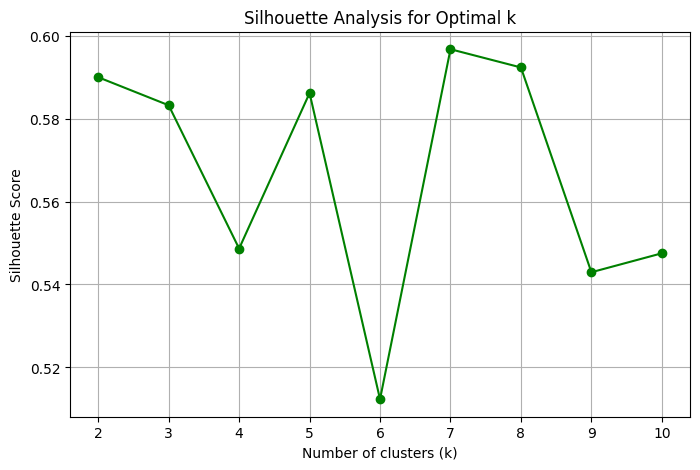

In [9]:
from sklearn.metrics import silhouette_score

# 1. 2D 데이터 (예: score만 가지고)
X = df[['score']]  # 또는 [['latitude', 'longitude']] 등 위치 기반도 가능

# 2. silhouette score 계산 (k=2 이상부터 가능)
scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)
    print(f"k={k}, silhouette_score={score:.4f}")

# 3. 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, marker='o', color='green')
plt.xticks(k_range)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_12752\2811801041.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='score_cluster_str', y='score', data=df, palette=cluster_palette, order=cluster_order, legend=False)


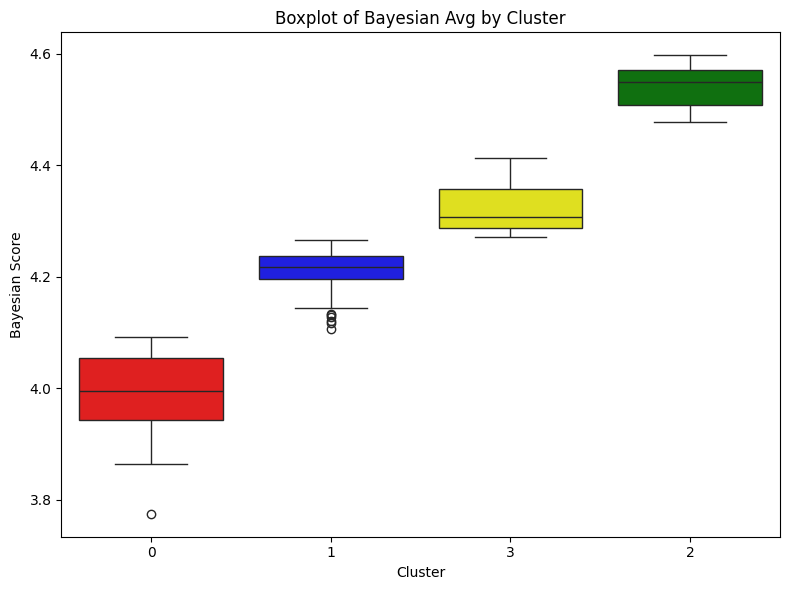

In [12]:
# 1. KMeans 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
df['score_cluster'] = kmeans.fit_predict(df[['score']])

# 1-2. Quantile Binning (KMeans가 잘 안되는 경우)
#df['score_cluster'] = pd.qcut(df['score'], q=4, labels=['0', '1', '2', '3'])

# 2. 박스플롯 시각화
cluster_palette = {'0': 'red', '1': 'blue', '2': 'green', '3': 'yellow'}
cluster_order = df.groupby('score_cluster')['score'].mean().sort_values().index.tolist()
df['score_cluster_str'] = df['score_cluster'].astype(str)

plt.figure(figsize=(8, 6))
sns.boxplot(x='score_cluster_str', y='score', data=df, palette=cluster_palette, order=cluster_order, legend=False)
plt.title("Boxplot of Bayesian Avg by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Bayesian Score")
plt.tight_layout()
plt.show()

# 3. Folium 지도 시각화
color_palette = ['red', 'blue', 'green', 'yellow']
map_center = [df['latitude'].mean(), df['longitude'].mean()]
map_ = folium.Map(location=map_center, zoom_start=10)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=0.5,
        color=color_palette[row['score_cluster']],
        fill=True,
        fill_opacity=0.7,
        popup=f"{row['tour_name']}<br>Score: {row['score']:.2f}"
    ).add_to(map_)

map_.save("clustered_score_map.html")


#### 추가) 각 위치 군집별 평점 + 리뷰 수 score

C:\Users\pc\AppData\Local\Temp\ipykernel_47676\2070890543.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='kmeans', y='score_cluster', data=df, order=cluster_order, palette=palette)


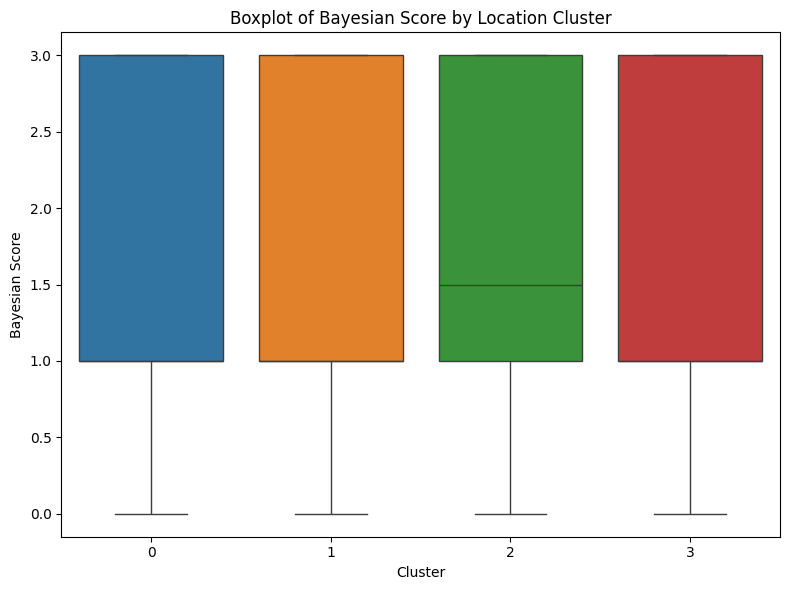

In [14]:
# 클러스터링
k = 4 
kmeans = KMeans(n_clusters=k, random_state=42)
df['kmeans'] = kmeans.fit_predict(df[['latitude', 'longitude']])
df['score_cluster'] = kmeans.fit_predict(df[['score']])

# 고정된 색상 매핑 (tab10은 10가지 색상 제공)
palette = sns.color_palette("tab10", n_colors=k)
cluster_order = sorted(df['kmeans'].unique())  # 클러스터 순서 정렬

# 박스플롯
plt.figure(figsize=(8, 6))
sns.boxplot(x='kmeans', y='score_cluster', data=df, order=cluster_order, palette=palette)
plt.title("Boxplot of Bayesian Score by Location Cluster")
plt.xlabel("Cluster")
plt.ylabel("Bayesian Score")
plt.tight_layout()
plt.show()

In [14]:
from scipy.stats import f_oneway

groups = [group['score'].values for _, group in df.groupby('kmeans')] 
f_stat, p_val = f_oneway(*groups)

print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val:.3g}") # p-value < 0.05 : 군집 간 점수 차이가 유의미 (위치에 따라 점수가 다를 가능성 있다)

ANOVA F-statistic: 1.201, p-value: 0.311


--------------------------------------------------------------------------------------------------------------------
#### 4-1. 위치 클러스터별 대표 키워드 및 부정 리뷰가 많은 원인 분석

In [62]:
from bson import ObjectId

results = col.aggregate([
    {"$unwind": "$reviews"},
    {"$match": {"reviews.keywords_analysis": {"$exists": True}}},
    {"$project": {
        "tour_name": 1,
        "avg_rating": 1,
        "review_count": 1,
        "location.coordinates": 1,
        "longitude": 1,  
        "latitude": 1,
        "review_content": "$reviews.content",
        "keywords_analysis": "$reviews.keywords_analysis"
    }}
])

results_list = list(results)
print("키워드 추출된 리뷰 수:", len(results_list))

키워드 추출된 리뷰 수: 4123


In [63]:
import pprint
pprint.pprint(results_list[0])

{'_id': ObjectId('67f4bc02e822ccb198c3e63b'),
 'avg_rating': 4.2,
 'keywords_analysis': [{'category': '활동', 'keyword': '발카트', 'sentiment': '긍정'},
                       {'category': '동물', 'keyword': '고양이', 'sentiment': '긍정'},
                       {'category': '경험', 'keyword': '시간', 'sentiment': '긍정'}],
 'latitude': 33.3653429,
 'location': {'coordinates': [126.2613767, 33.3653429]},
 'longitude': 126.2613767,
 'review_content': '사실 별거없는데 재밌어요. 고양이도 귀엽고 발카트가 너무제밌어서 아이들이랑 시간가는줄 모르고 놀았어요.',
 'review_count': 3878,
 'tour_name': '김녕미로공원'}


In [64]:
df1 = pd.DataFrame(results_list)

coords = df1[["longitude", "latitude"]]
kmeans = KMeans(n_clusters=6, random_state=42)
df1["cluster"] = kmeans.fit_predict(coords)

In [65]:
from collections import defaultdict, Counter

# 클러스터별 감성 종류별 키워드 카운트
cluster_sentiment_keywords = {
    "긍정": defaultdict(Counter),
    "부정": defaultdict(Counter),
    "중립": defaultdict(Counter)
}

for _, row in df1.iterrows():
    cluster = row["cluster"]
    for item in row["keywords_analysis"]:
        keyword = item["keyword"]
        sentiment = item["sentiment"]

        if sentiment in cluster_sentiment_keywords:
            cluster_sentiment_keywords[sentiment][cluster][keyword] += 1

In [66]:
for cluster in sorted(df1["cluster"].unique()):
    print(f"\n[클러스터 {cluster}]")

    for sentiment in ["긍정", "부정", "중립"]:
        print(f"  📌 {sentiment} 키워드 TOP 3:")
        top_keywords = cluster_sentiment_keywords[sentiment][cluster].most_common(3)
        if top_keywords:
            for kw, cnt in top_keywords:
                print(f"    - {kw}: {cnt}회")
        else:
            print("    (해당 감성 키워드 없음)")


[클러스터 0]
  📌 긍정 키워드 TOP 3:
    - 사진: 65회
    - 산책: 58회
    - 정원: 49회
  📌 부정 키워드 TOP 3:
    - 입장료: 23회
    - 사람: 17회
    - 주차장: 15회
  📌 중립 키워드 TOP 3:
    - 입장료: 7회
    - 입구: 5회
    - 시간: 5회

[클러스터 1]
  📌 긍정 키워드 TOP 3:
    - 사진: 61회
    - 산책: 58회
    - 코스: 34회
  📌 부정 키워드 TOP 3:
    - 입장료: 18회
    - 길: 13회
    - 화장실: 11회
  📌 중립 키워드 TOP 3:
    - 입장료: 17회
    - 시간: 11회
    - 거문오름: 9회

[클러스터 2]
  📌 긍정 키워드 TOP 3:
    - 산책: 67회
    - 바다: 60회
    - 폭포: 58회
  📌 부정 키워드 TOP 3:
    - 입장료: 20회
    - 길: 15회
    - 계단: 15회
  📌 중립 키워드 TOP 3:
    - 주차장: 14회
    - 입장료: 13회
    - 시간: 11회

[클러스터 3]
  📌 긍정 키워드 TOP 3:
    - 산책: 56회
    - 사진: 52회
    - 제주: 36회
  📌 부정 키워드 TOP 3:
    - 볼거리: 11회
    - 사람: 9회
    - 주차장: 7회
  📌 중립 키워드 TOP 3:
    - 주차장: 9회
    - 길: 9회
    - 박물관: 8회

[클러스터 4]
  📌 긍정 키워드 TOP 3:
    - 사진: 63회
    - 폭포: 45회
    - 산책: 39회
  📌 부정 키워드 TOP 3:
    - 입장료: 30회
    - 계단: 16회
    - 가격: 11회
  📌 중립 키워드 TOP 3:
    - 입장료: 19회
    - 폭포: 14회
    - 시간: 12회

[클러스터 5]
  📌 긍정 키워드 TOP 3:
    - 사진: 70회
   

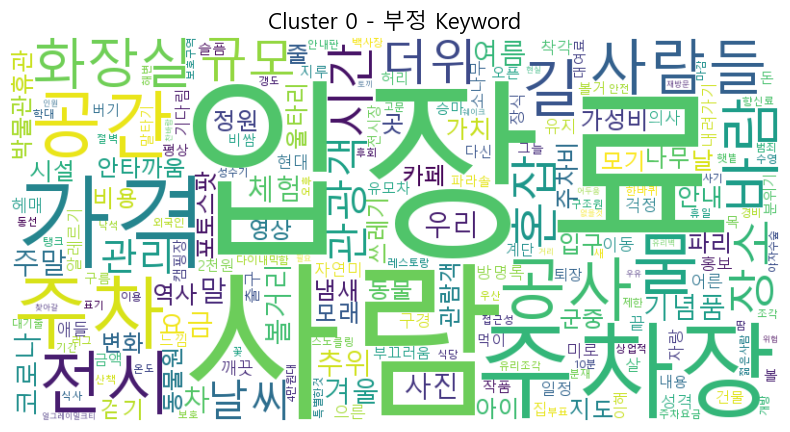

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(cluster_id, sentiment):
    counter = cluster_sentiment_keywords[sentiment][cluster_id]
    if not counter:
        print(f"[클러스터 {cluster_id} - {sentiment}] 키워드 없음")
        return

    wordcloud = WordCloud(font_path="malgun.ttf", background_color="white", width=800, height=400)
    wordcloud.generate_from_frequencies(counter)
    
    from matplotlib import rcParams
    # 윈도우 기본 한글 폰트 # 다른 OS 쓰시는 분들은 지워주세요!
    plt.rcParams['font.family'] = 'Malgun Gothic' 
    plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 깨짐 방지

    plt.figure(figsize=(10, 5))
    plt.title(f"Cluster {cluster_id} - {sentiment} Keyword", fontsize=16)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# 실행 예시
plot_wordcloud(cluster_id=0, sentiment="부정")

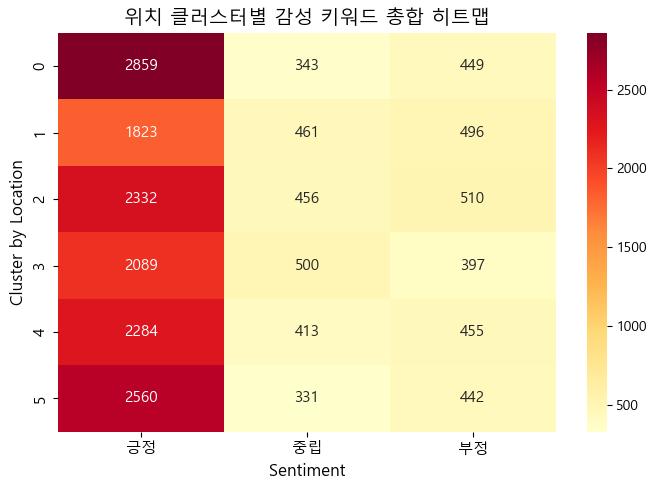

In [ ]:
# 감성별 키워드 총합 카운트
summary_data = []

for cluster in sorted(df1["cluster"].unique()):
    row = {"cluster": cluster}
    for sentiment in ["긍정", "중립", "부정"]:
        count = sum(cluster_sentiment_keywords[sentiment][cluster].values())
        row[sentiment] = count
    summary_data.append(row)

summary_df = pd.DataFrame(summary_data)
summary_df.set_index("cluster", inplace=True)

fig, ax = plt.subplots(figsize=(7, 5))  

sns.heatmap(
    summary_df.astype(int),
    annot=True,
    fmt="d",
    cmap="YlOrRd",
    annot_kws={"size": 11},
    ax=ax 
)

ax.set_title("위치 클러스터별 감성 키워드 총합 히트맵", fontsize=14)
ax.set_xlabel("Sentiment", fontsize=12)
ax.set_ylabel("Cluster by Location", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)

plt.tight_layout()
plt.show()

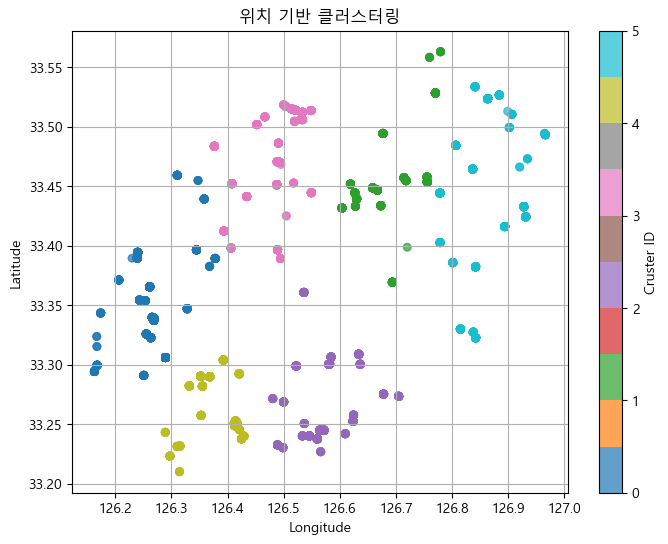

In [83]:
# 위치를 어떻게 나눴나 다시 확인
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df1["longitude"], df1["latitude"],
    c=df1["cluster"], cmap="tab10", s=30, alpha=0.7
)
plt.title("위치 기반 클러스터링")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(scatter, label="Cruster ID")
plt.grid(True)
plt.show()

#### 4-2. 평점 + 리뷰 수 기반 클러스터별 대표 키워드 및 부정 리뷰가 많은 원인 분석

In [ ]:
# _id로 하니까 오류가 생겨서 장소명 기준으로 했습니다ㅜㅜ
# 이 코드로 중복 확인하시고 없으면 그대로 하시면 됩니다
df["tour_name"].duplicated().any()

np.False_

In [90]:
merged_df = df1.merge(df[["tour_name", "score_cluster"]], on="tour_name", how="left")
print(merged_df[["tour_name", "score_cluster", "keywords_analysis"]].head())

  tour_name  score_cluster                                  keywords_analysis
0    김녕미로공원            1.0  [{'category': '활동', 'keyword': '발카트', 'sentime...
1    김녕미로공원            1.0  [{'category': '경관', 'keyword': '그늘', 'sentimen...
2    김녕미로공원            1.0  [{'category': '활동', 'keyword': '미로', 'sentimen...
3    김녕미로공원            1.0  [{'category': '활동', 'keyword': '미로', 'sentimen...
4    김녕미로공원            1.0  [{'category': '경관]', 'keyword': '고양이', 'sentim...


C:\Users\pc\AppData\Local\Temp\ipykernel_27424\1133163949.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='score_cluster_str', y='score', data=df, palette=cluster_palette, order=cluster_order, legend=False)


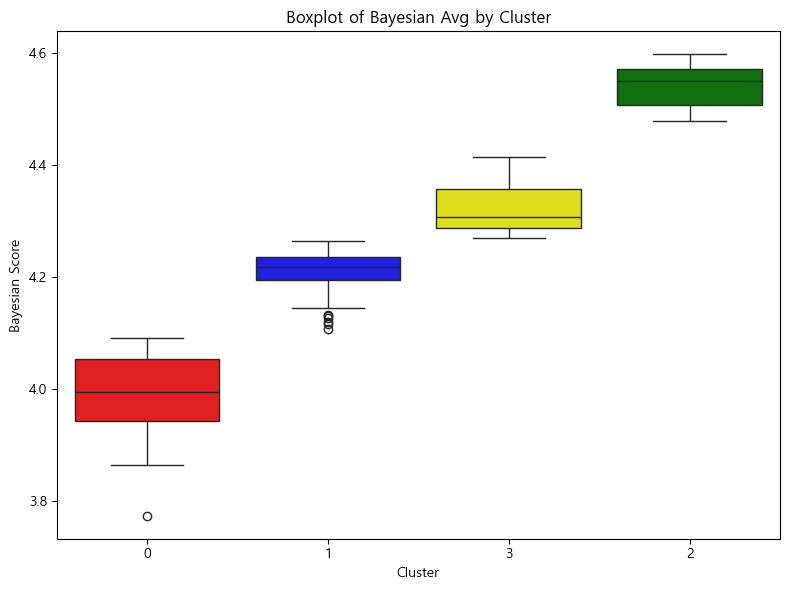

In [91]:
# 점수를 어떻게 나눴나 다시 확인
cluster_palette = {'0': 'red', '1': 'blue', '2': 'green', '3': 'yellow'}
cluster_order = df.groupby('score_cluster')['score'].mean().sort_values().index.tolist()
df['score_cluster_str'] = df['score_cluster'].astype(str)

plt.figure(figsize=(8, 6))
sns.boxplot(x='score_cluster_str', y='score', data=df, palette=cluster_palette, order=cluster_order, legend=False)
plt.title("Boxplot of Bayesian Avg by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Bayesian Score")
plt.tight_layout()
plt.show()

In [92]:
scorecluster_keywords = {
    "긍정": defaultdict(Counter),
    "부정": defaultdict(Counter),
    "중립": defaultdict(Counter)
}

for _, row in merged_df.iterrows():
    cluster = row["score_cluster"]
    for item in row["keywords_analysis"]:
        keyword = item["keyword"]
        sentiment = item["sentiment"]
        if sentiment in scorecluster_keywords:
            scorecluster_keywords[sentiment][cluster][keyword] += 1

In [93]:
for cluster in sorted(merged_df["score_cluster"].dropna().unique()):
    print(f"\n[Score 클러스터 {cluster}]")
    for sentiment in ["긍정", "부정", "중립"]:
        print(f"  {sentiment} 키워드 TOP 3:")
        for kw, cnt in scorecluster_keywords[sentiment][cluster].most_common(3):
            print(f"    - {kw}: {cnt}회")


[Score 클러스터 0.0]
  긍정 키워드 TOP 3:
    - 사진: 82회
    - 산책: 38회
    - 아이들: 37회
  부정 키워드 TOP 3:
    - 입장료: 30회
    - 가격: 17회
    - 관리: 16회
  중립 키워드 TOP 3:
    - 입장료: 13회
    - 사진: 8회
    - 사람: 8회

[Score 클러스터 1.0]
  긍정 키워드 TOP 3:
    - 사진: 132회
    - 산책: 69회
    - 정원: 67회
  부정 키워드 TOP 3:
    - 입장료: 36회
    - 사람: 26회
    - 길: 14회
  중립 키워드 TOP 3:
    - 입장료: 22회
    - 시간: 15회
    - 박물관: 11회

[Score 클러스터 2.0]
  긍정 키워드 TOP 3:
    - 산책: 39회
    - 폭포: 39회
    - 숲: 37회
  부정 키워드 TOP 3:
    - 길: 7회
    - 주차장: 7회
    - 사람: 7회
  중립 키워드 TOP 3:
    - 시간: 10회
    - 입구: 9회
    - 입장료: 9회

[Score 클러스터 3.0]
  긍정 키워드 TOP 3:
    - 산책: 143회
    - 사진: 94회
    - 바다: 90회
  부정 키워드 TOP 3:
    - 계단: 34회
    - 입장료: 22회
    - 사람: 18회
  중립 키워드 TOP 3:
    - 주차장: 26회
    - 시간: 20회
    - 입장료: 19회


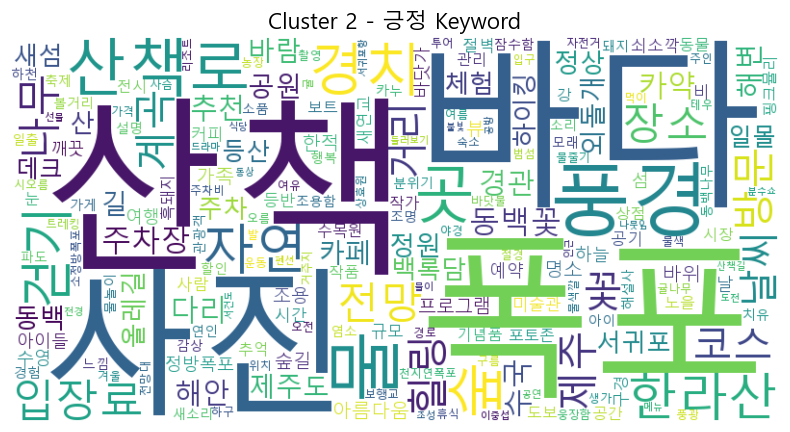

In [94]:
def plot_wordcloud(score_cluster, sentiment):
    counter = cluster_sentiment_keywords[sentiment][score_cluster]
    if not counter:
        print(f"[클러스터 {score_cluster} - {sentiment}] 키워드 없음")
        return

    wordcloud = WordCloud(font_path="malgun.ttf", background_color="white", width=800, height=400)
    wordcloud.generate_from_frequencies(counter)
    
    from matplotlib import rcParams
    # 윈도우 기본 한글 폰트 # 다른 OS 쓰시는 분들은 지워주세요!
    plt.rcParams['font.family'] = 'Malgun Gothic' 
    plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 깨짐 방지

    plt.figure(figsize=(10, 5))
    plt.title(f"Cluster {score_cluster} - {sentiment} Keyword", fontsize=16)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# 실행 예시
plot_wordcloud(score_cluster=2, sentiment="긍정")

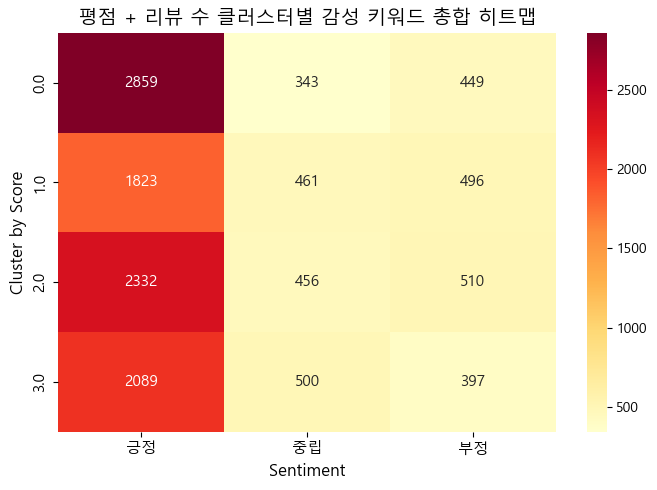

In [96]:
# 감성별 키워드 총합 카운트
summary_data2 = []

for cluster in sorted(merged_df["score_cluster"].dropna().unique()):
    row = {"cluster": cluster}
    for sentiment in ["긍정", "중립", "부정"]:
        count = sum(cluster_sentiment_keywords[sentiment][cluster].values())
        row[sentiment] = count
    summary_data2.append(row)

summary_df2 = pd.DataFrame(summary_data2)
summary_df2.set_index("cluster", inplace=True)

fig, ax = plt.subplots(figsize=(7, 5))  

sns.heatmap(
    summary_df2.astype(int),
    annot=True,
    fmt="d",
    cmap="YlOrRd",
    annot_kws={"size": 11},
    ax=ax 
)

ax.set_title("평점 + 리뷰 수 클러스터별 감성 키워드 총합 히트맵", fontsize=14)
ax.set_xlabel("Sentiment", fontsize=12)
ax.set_ylabel("Cluster by Score", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)

plt.tight_layout()
plt.show()

#### 5. 위치 클러스터에 따라 리뷰 감성은 통계적으로 유의하게 다른가?

**1.**  
`sentiment`에서 감정을 점수화하여 총합을 계산함: 긍정은 `+1`, 중립은 `0`, 부정은 `-1`  
- 총합이 `0` 초과 → **긍정**  
- 총합이 `0` → **중립**  
- 총합이 `0` 미만 → **부정**  

이 기준으로 각 리뷰의 최종 감성을 판단하고, `df1`에 `review_sentiment`라는 새 column으로 저장함  

**2.**  
만들어진 `review_sentiment` 컬럼을 기준으로  
`df1["cluster"]` (위치 클러스터)와 연관성이 있는지 **ANOVA** 수행   

**데이터셋 정리**   
`df` : 기존    
`df1` : 키워드가 추출된 리뷰들 모아둠    
`merged_df` : 장소명 기준으로 df와 df1을 묶음 (장소의 평점 + 리뷰 수를 기준으로, 리뷰에 어떤 키워드가 있는지 알기 위함)


In [100]:
def analyze_review_sentiment(keyword_list):
    score_map = {"긍정": 1, "중립": 0, "부정": -1}
    total_score = sum(score_map.get(item["sentiment"], 0) for item in keyword_list)
    if total_score > 0:
        return "긍정"
    elif total_score < 0:
        return "부정"
    else:
        return "중립"

df1["review_sentiment"] = df1["keywords_analysis"].apply(analyze_review_sentiment)

In [101]:
df1.head(2)

,_id,tour_name,avg_rating,latitude,longitude,review_count,location,review_content,keywords_analysis,cluster,bayesian_weight,review_sentiment
0,67f4bc02e822ccb198c3e63b,김녕미로공원,4.2,33.365343,126.261377,3878.0,"{'coordinates': [126.2613767, 33.3653429]}",사실 별거없는데 재밌어요. 고양이도 귀엽고 발카트가 너무제밌어서 아이들이랑 시간가는...,"[{'category': '활동', 'keyword': '발카트', 'sentime...",0,4.208956,긍정
1,67f4bc02e822ccb198c3e63b,김녕미로공원,4.2,33.365343,126.261377,3878.0,"{'coordinates': [126.2613767, 33.3653429]}","35도 육박하는 매우 더운 날 갔습니다만, 미로를 만들기 위한 나무의 키가 다 크다...","[{'category': '경관', 'keyword': '그늘', 'sentimen...",0,4.208956,긍정


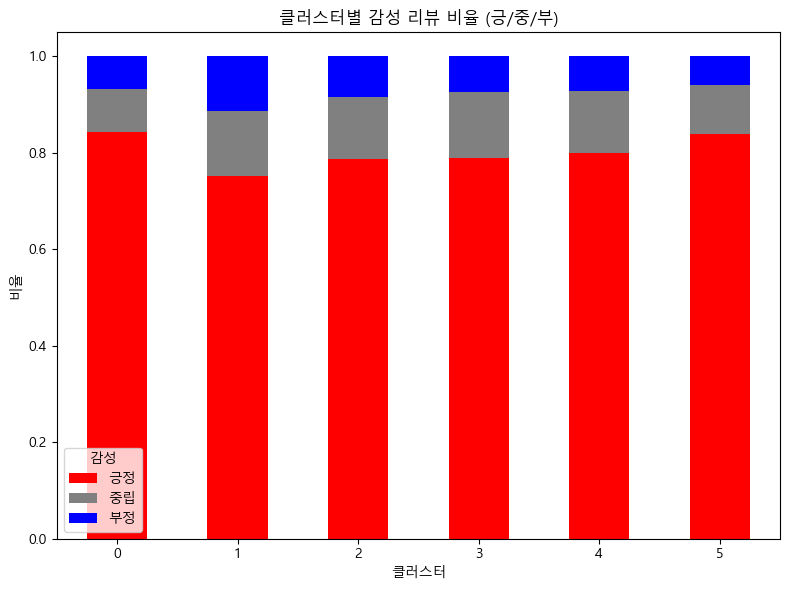

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# 클러스터별 감성 카운트 데이터프레임 생성
sentiment_summary = df1.groupby(["cluster", "review_sentiment"]).size().unstack().fillna(0)

# 감성 비율로 변환
sentiment_ratio = sentiment_summary.div(sentiment_summary.sum(axis=1), axis=0)

# 시각화
sentiment_ratio.plot(kind="bar", stacked=True, color=["red", "gray", "blue"], figsize=(8,6))

plt.title("클러스터별 감성 리뷰 비율 (긍/중/부)")
plt.ylabel("비율")
plt.xlabel("클러스터")
plt.legend(title="감성", labels=["긍정", "중립", "부정"])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [102]:
from scipy.stats import f_oneway

sentiment_score_map = {"긍정": 1, "중립": 0, "부정": -1}
df1["sentiment_score"] = df1["review_sentiment"].map(sentiment_score_map)

# 위치 클러스터 기준 그룹화
grouped = df1.groupby("cluster")["sentiment_score"].apply(list)

# ANOVA 실행
anova_result = f_oneway(*grouped.tolist())
print(f"ANOVA F-statistic: {anova_result.statistic:.3f}, p-value: {anova_result.pvalue:.3f}")

ANOVA F-statistic: 4.131, p-value: 0.001


In [107]:
from scipy.stats import shapiro

for c in sorted(df1["cluster"].dropna().unique()):
    scores = df1[df1["cluster"] == c]["sentiment_score"]
    stat, p = shapiro(scores)
    print(f"클러스터 {c} - Shapiro-Wilk p-value: {p:.4f}")


from scipy.stats import levene

grouped_scores = [
    df1[df1["cluster"] == c]["sentiment_score"].values
    for c in sorted(df1["cluster"].dropna().unique())
]

stat, p = levene(*grouped_scores)
print(f"Levene 등분산성 검정 p-value: {p:.4f}")

클러스터 0 - Shapiro-Wilk p-value: 0.0000
클러스터 1 - Shapiro-Wilk p-value: 0.0000
클러스터 2 - Shapiro-Wilk p-value: 0.0000
클러스터 3 - Shapiro-Wilk p-value: 0.0000
클러스터 4 - Shapiro-Wilk p-value: 0.0000
클러스터 5 - Shapiro-Wilk p-value: 0.0000
Levene 등분산성 검정 p-value: 0.0010


In [ ]:
# 정규성/등분산성 가정 만족 못할 경우 (Shapiro: p < 0.05 → 정규성 깨짐 & Levene: p < 0.05 → 등분산성 깨짐)
# p-value < 0.05 : 위치 클러스터에 따라 리뷰 감성이 통계적으로 유의하게 다르다
from scipy.stats import kruskal

stat, p = kruskal(*grouped_scores)
print(f"Kruskal-Wallis p-value: {p:.4f}")

Kruskal-Wallis p-value: 0.0002


In [128]:
import scikit_posthocs as sp

# sentiment_score 기반 Dunn's test 실행
dunn_result = sp.posthoc_dunn(df1, val_col="sentiment_score", group_col="cluster", p_adjust="bonferroni")

# 이 결과는 p-value 행렬
# cluster A vs cluster B 간의 유의미한 차이가 있는지를 나타냄
# 일반 기준: p < 0.05 → 유의미한 차이 & p ≥ 0.05 → 통계적으로 차이 없음
print("Dunn's Test 결과 (p-value matrix)")
print(dunn_result.round(4))

Dunn's Test 결과 (p-value matrix)
        0       1       2       3       4       5
0  1.0000  0.0009  0.0859  0.1135  0.4443  1.0000
1  0.0009  1.0000  1.0000  1.0000  0.8708  0.0039
2  0.0859  1.0000  1.0000  1.0000  1.0000  0.2483
3  0.1135  1.0000  1.0000  1.0000  1.0000  0.3131
4  0.4443  0.8708  1.0000  1.0000  1.0000  1.0000
5  1.0000  0.0039  0.2483  0.3131  1.0000  1.0000


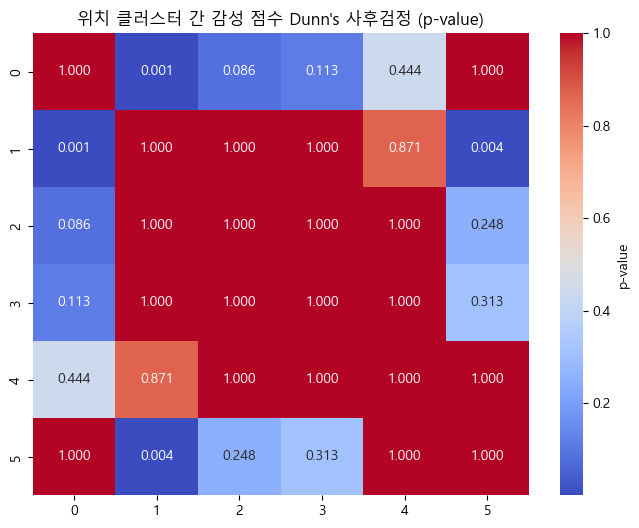

In [130]:
plt.figure(figsize=(8, 6))
sns.heatmap(dunn_result, annot=True, fmt=".3f", cmap="coolwarm", cbar_kws={"label": "p-value"})
plt.title("위치 클러스터 간 감성 점수 Dunn's 사후검정 (p-value)")
plt.show()

In [109]:
from collections import Counter

# 클러스터별 리뷰 감성 분포
cluster_sentiment_review_count = {}

for cluster_id in sorted(df1["cluster"].dropna().unique()):
    sentiments = df1[df1["cluster"] == cluster_id]["sentiment_score"]
    
    pos = (sentiments > 0).sum()
    neu = (sentiments == 0).sum()
    neg = (sentiments < 0).sum()
    
    cluster_sentiment_review_count[cluster_id] = {
        "긍정": pos,
        "중립": neu,
        "부정": neg
    }

# 출력
for cid, c in cluster_sentiment_review_count.items():
    print(f"📍 클러스터 {cid} - 긍정: {c['긍정']}, 중립: {c['중립']}, 부정: {c['부정']}")

📍 클러스터 0 - 긍정: 645, 중립: 52, 부정: 68
📍 클러스터 1 - 긍정: 442, 중립: 67, 부정: 78
📍 클러스터 2 - 긍정: 549, 중립: 59, 부정: 90
📍 클러스터 3 - 긍정: 530, 중립: 49, 부정: 92
📍 클러스터 4 - 긍정: 552, 중립: 50, 부정: 88
📍 클러스터 5 - 긍정: 597, 중립: 42, 부정: 73


In [110]:
# 클러스터 중심 좌표
cluster_centers = df1.groupby("cluster")[["longitude", "latitude"]].mean()

positives = []
negatives = []

for cid in cluster_centers.index:
    data = cluster_sentiment_review_count.get(cid, {})
    positives.append(data.get("긍정", 0))
    negatives.append(data.get("부정", 0))

In [114]:
# 지도 초기화
m = folium.Map(location=[df1["latitude"].mean(), df1["longitude"].mean()], zoom_start=11)

for cid, row in cluster_centers.iterrows():
    lat = row["latitude"]
    lon = row["longitude"]
    
    sent = cluster_sentiment_review_count.get(cid, {})
    pos = sent.get("긍정", 0)
    neg = sent.get("부정", 0)

    # 긍정 마커 (빨간색)
    if pos > 0:
        folium.CircleMarker(
            location=[lat + 0.002, lon],  # 약간 위로 이동해 겹침 줄임
            radius=5 + pos * 0.05,
            color="red",
            fill=True,
            fill_color="red",
            fill_opacity=0.5,
            popup=folium.Popup(f"클러스터 {cid} - 긍정 리뷰 수: {pos}", max_width=200)
        ).add_to(m)

    # 부정 마커 (파란색)
    if neg > 0:
        folium.CircleMarker(
            location=[lat - 0.002, lon],  # 약간 아래로 이동해 겹침 줄임
            radius=5 + neg * 0.05,
            color="blue",
            fill=True,
            fill_color="blue",
            fill_opacity=0.5,
            popup=folium.Popup(f"클러스터 {cid} - 부정 리뷰 수: {neg}", max_width=200)
        ).add_to(m)

m.save("cluster_sentiment_dual_circles.html")

In [120]:
import pandas as pd

# 1. 클러스터별 긍정, 부정 수 집계 → DataFrame으로 정리
cluster_stats = []

for cid, stat in cluster_sentiment_review_count.items():
    pos = stat.get("긍정", 0)
    neg = stat.get("부정", 0)
    total = pos + neg
    pos_ratio = pos / total if total > 0 else 0
    neg_ratio = neg / total if total > 0 else 0

    cluster_stats.append({
        "cluster": cid,
        "긍정 리뷰수": pos,
        "부정 리뷰수": neg,
        "긍정률(%)": round(pos_ratio * 100, 1),
        "부정률(%)": round(neg_ratio * 100, 1)
    })

df_stats = pd.DataFrame(cluster_stats)

print("✅ 긍정 리뷰 수 TOP 클러스터")
print(df_stats.sort_values("긍정 리뷰수", ascending=False).to_string(index=False))

print("\n🚫 부정 리뷰 수 TOP 클러스터")
print(df_stats.sort_values("부정 리뷰수", ascending=False).to_string(index=False))



✅ 긍정 리뷰 수 TOP 클러스터
 cluster  긍정 리뷰수  부정 리뷰수  긍정률(%)  부정률(%)
       0     645      68    90.5     9.5
       5     597      73    89.1    10.9
       4     552      88    86.2    13.8
       2     549      90    85.9    14.1
       3     530      92    85.2    14.8
       1     442      78    85.0    15.0

🚫 부정 리뷰 수 TOP 클러스터
 cluster  긍정 리뷰수  부정 리뷰수  긍정률(%)  부정률(%)
       3     530      92    85.2    14.8
       2     549      90    85.9    14.1
       4     552      88    86.2    13.8
       1     442      78    85.0    15.0
       5     597      73    89.1    10.9
       0     645      68    90.5     9.5


In [121]:
print("\n👍 긍정률 높은 순")
print(df_stats.sort_values("긍정률(%)", ascending=False).to_string(index=False))

print("\n👎 부정률 높은 순")
print(df_stats.sort_values("부정률(%)", ascending=False).to_string(index=False))


👍 긍정률 높은 순
 cluster  긍정 리뷰수  부정 리뷰수  긍정률(%)  부정률(%)
       0     645      68    90.5     9.5
       5     597      73    89.1    10.9
       4     552      88    86.2    13.8
       2     549      90    85.9    14.1
       3     530      92    85.2    14.8
       1     442      78    85.0    15.0

👎 부정률 높은 순
 cluster  긍정 리뷰수  부정 리뷰수  긍정률(%)  부정률(%)
       1     442      78    85.0    15.0
       3     530      92    85.2    14.8
       2     549      90    85.9    14.1
       4     552      88    86.2    13.8
       5     597      73    89.1    10.9
       0     645      68    90.5     9.5


#### 6. 여행 루트

In [14]:
# 2. 각 컬렉션별 이름 리스트 및 정확한 필드명 지정
collections = {
    "tour": {
        "col_name": "GoogleMap_jeju",
        "field": "tour_name",
        "names": [
            "한라산 국립공원", "제주 4.3 평화공원", "협재해변", "제주절물자연휴양림", "비자림",
            "서귀포 치유의숲", "정방폭포", "거문오름", "한라 생태숲", "어승생악"
        ]
    },
    "stay": {
        "col_name": "Agoda_jeju",
        "field": "hotel_name",
        "names": [
            "조천의 프라이빗 하우스", "성산의 프라이빗 하우스", "sopoong 제주소풍 친구", "Miya's garden",
            "sopoong 제주소풍3인실", "sopoong 제주소풍 traveler", "애월의 빌라",
            "JEJU HEALING STAY YEOYULEUL"
        ]
    },
    "food": {
        "col_name": "kmap_jeju",
        "field": "restaurant_name",
        "names": [
            "금돈흑돼지", "칠프로칠백식당 아라 직영점", "또또고깃간", "마루아라", "바다풍경정육식당",
            "꺼멍목장", "중문그때그집 서귀포본점", "언덕집국수", "코코하 kokohaha by 카카오패밀리 초콜릿 전문점", "찰리공장"
        ]
    }
}

# 3. 색상 매핑
type_colors = {
    "tour": "red",
    "stay": "orange",
    "food": "blue"
}

# 4. 장소 수집 및 중복 제거
features = []
seen_coords = set()

for place_type, conf in collections.items():
    col = db[conf["col_name"]]
    field = conf["field"]
    for name in conf["names"]:
        # regex 검색
        query = {field: {"$regex": name, "$options": "i"}}
        doc = col.find_one(query)
        if not doc:
            continue
        lat = doc.get("latitude")
        lng = doc.get("longitude")
        if lat is None or lng is None:
            continue
        try:
            lat = round(float(lat), 6)
            lng = round(float(lng), 6)
        except:
            continue
        coord_key = (lat, lng)
        if coord_key in seen_coords:
            continue
        seen_coords.add(coord_key)

        features.append({
            "type": "Feature",
            "geometry": {
                "type": "Point",
                "coordinates": [lng, lat]
            },
            "properties": {
                "name": doc.get(field, name),
                "lat": lat,
                "lng": lng,
                "type": place_type,
                "color": type_colors[place_type]
            }
        })

# 5. GeoJSON 저장
geojson = {
    "type": "FeatureCollection",
    "features": features
}

with open("jeju_selected_places.geojson", "w", encoding="utf-8") as f:
    json.dump(geojson, f, ensure_ascii=False, indent=2)

print(f"✅ 저장 완료! 총 {len(features)}개 장소 GeoJSON 파일로 저장됨.")


✅ 저장 완료! 총 22개 장소 GeoJSON 파일로 저장됨.


In [15]:
import folium
import json

# 1. GeoJSON 불러오기
with open("jeju_selected_places.geojson", encoding="utf-8") as f:
    geojson = json.load(f)

# 2. 지도 중심: 위도 경도 평균
lat_mean = sum(f["properties"]["lat"] for f in geojson["features"]) / len(geojson["features"])
lng_mean = sum(f["properties"]["lng"] for f in geojson["features"]) / len(geojson["features"])

m = folium.Map(location=[lat_mean, lng_mean], zoom_start=10)

# 3. 각 장소 마커 표시
for feature in geojson["features"]:
    prop = feature["properties"]
    folium.CircleMarker(
        location=[prop["lat"], prop["lng"]],
        radius=7,
        popup=f"{prop['name']} ({prop['type']})",
        color=prop["color"],
        fill=True,
        fill_opacity=0.8
    ).add_to(m)

# 4. 지도 저장 및 열기
m.save("jeju_map.html")
print("✅ 지도 저장 완료: jeju_map.html")

✅ 지도 저장 완료: jeju_map.html


In [16]:
from geopy.distance import geodesic


# 1. 공항 좌표
jeju_airport = (33.5067, 126.4929)

# 2. GeoJSON 로드
with open("jeju_selected_places.geojson", encoding="utf-8") as f:
    geojson = json.load(f)

# 3. GeoJSON → DataFrame 변환
df = pd.DataFrame([
    {
        "name": feat["properties"]["name"],
        "type": feat["properties"]["type"],
        "lat": feat["properties"]["lat"],
        "lng": feat["properties"]["lng"],
        "color": feat["properties"]["color"]
    }
    for feat in geojson["features"]
])

# 4. 거리 계산 함수
def dist_from_airport(row):
    return geodesic((row["lat"], row["lng"]), jeju_airport).km

df["dist"] = df.apply(dist_from_airport, axis=1)

# 5. 숙소: 가까운 순 3개, 식당: 가까운 순 6개, 관광지: 나머지 중 가까운 순
stay = df[df["type"] == "stay"].sort_values("dist").head(3)
food = df[df["type"] == "food"].sort_values("dist").head(6)
tour = df[df["type"] == "tour"].sort_values("dist").head(10)  # 관광지는 유연하게

# 6. 여행일자별 일정 구성
day1 = pd.concat([stay.iloc[[0]], food.iloc[[0, 1]], tour.iloc[[0, 1]]])
day2 = pd.concat([stay.iloc[[1]], food.iloc[[2, 3]], tour.iloc[[2, 3]]])
day3 = pd.concat([stay.iloc[[2]], food.iloc[[4, 5]], tour.iloc[[4, 5]]])
days = [day1, day2, day3]
colors = ["red", "green", "blue"]

# 7. 지도 시각화
m = folium.Map(location=jeju_airport, zoom_start=10)

# 마커 찍기
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lng"]],
        radius=6,
        color=row["color"],
        fill=True,
        fill_opacity=0.8,
        popup=f"{row['type']} - {row['name']}"
    ).add_to(m)

# 루트 선 그리기
for i, day in enumerate(days):
    coords = [[row["lat"], row["lng"]] for _, row in day.iterrows()]
    coords = [list(jeju_airport)] + coords + [list(jeju_airport)]  # 공항 → ... → 공항
    folium.PolyLine(
        coords,
        color=colors[i],
        weight=4,
        opacity=0.7,
        tooltip=f"Day {i+1} Route"
    ).add_to(m)

# 8. 저장
m.save("jeju_route_plan.html")
print("✅ jeju_route_plan.html 저장 완료")


✅ jeju_route_plan.html 저장 완료


In [18]:
import folium
import json

# 1. geojson 파일 불러오기 (경로는 직접 저장한 파일 위치로 수정)
with open("map.geojson", encoding="utf-8") as f:
    data = json.load(f)

# 2. 중심 위치 설정 (예: 제주공항 근처)
jeju_center = [33.5067, 126.4929]
m = folium.Map(location=jeju_center, zoom_start=10)

# 3. GeoJSON 레이어 추가 (선 색상도 포함됨)
folium.GeoJson(
    data,
    name="geojson_layer",
    style_function=lambda feature: {
        'color': feature['properties'].get('color', 'black'),  # 기본색은 검정
        'weight': 4,
        'opacity': 0.8
    }
).add_to(m)

# 4. 저장
m.save("edited_jeju_route.html")
print("✅ 저장 완료: edited_jeju_route.html")

✅ 저장 완료: edited_jeju_route.html
